# Part 3: Regression in Pandas

In [ ]:
"""
----------------------------------------------------------------------
Filename : 03_regression_in_pandas_sm.py
Date     : 12th Dec, 2013
Author   : Jaidev Deshpande
Purpose  : Introduction to linear regression through Pandas and Statsmodels
Libraries: NumPy, Pandas, Matplotlib
----------------------------------------------------------------------
"""

In [1]:
# standard library imports
from os.path import join

# system library imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load during this part.
longevity = join('data','longevity.csv')
longevity = pd.read_csv(longevity)

In [8]:
longevity.head()

,Smokes,AgeAtDeath
0,1,75
1,1,72
2,1,66
3,1,74
4,1,69


## Regression in Pandas

In [6]:
def mean_squared_error(df,show_plot=True):
    """
    Get the mean squared error obtained when fitting a straight line
    through the longevity data.
    """
    age_at_death = df['AgeAtDeath']
    unique_ages = age_at_death.unique()
    unique_ages.sort()
    agediff = np.zeros((age_at_death.shape[0],unique_ages.shape[0]),
                        dtype=float)
    for i in range(agediff.shape[1]):
        agediff[:,i] = (age_at_death - unique_ages[i])**2
    mse_age = agediff.mean(0)
    if show_plot:
        plt.figure(figsize=(20,10))
        plt.plot(unique_ages, mse_age,'r.', markersize=12)
        plt.plot(unique_ages, mse_age, 'b--')
        plt.grid()
        plt.xlabel('Estimate of Age')
        plt.ylabel('Mean Squared Error')
        plt.show()
    return mse_age

def root_mean_squared_error(df,show_plot=False):
    return np.sqrt(mean_squared_error(df,show_plot=show_plot))

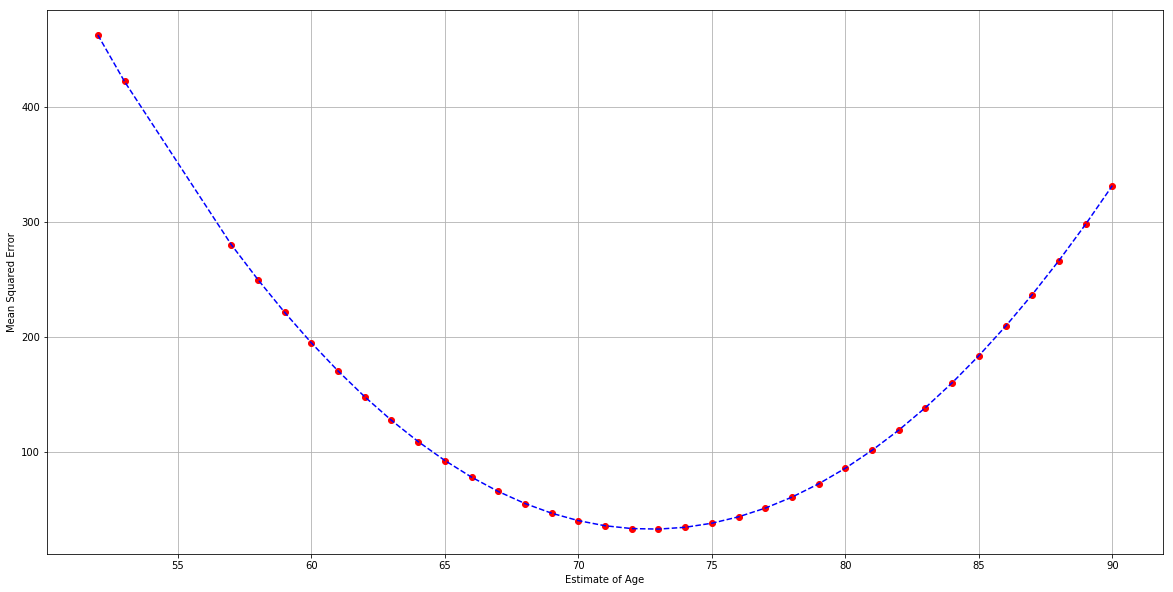

32.991
5.743779243668754


In [7]:
mse = mean_squared_error(longevity)
print(mse.min())
rmse = root_mean_squared_error(longevity)
print(rmse.min())

In [9]:
def plot_ols_fitted(df, xcol, ycol):
    """
    Fit an OLS model with the data contained in `df`,
    where `xcol` and `ycol` specify the columns to consider
    as the `x` and `y` axes respectively.
    """
    df_ols = pd.ols(x=df[xcol],y=df[ycol])
    df['estimate'] = df_ols.y_fitted
    fig = plt.figure(figsize=(20,10))
    axes = fig.add_subplot(111)
    pd.tools.plotting.scatter_plot(df, xcol, ycol, ax=axes)
    df.plot(xcol,'estimate',c='g',ax=axes,lw=5)
    plt.show()
    return df_ols

In [10]:
plot_ols_fitted(hwg, 'Height', 'Weight')

AttributeError: module 'pandas' has no attribute 'ols'

In [ ]:
def compare_sites_by_advertising(df):
    """
    Prints some vital statistics of the pageviews data.
    """
    advertised = df[df['HasAdvertising']=='Yes']
    nonadvert = df[df['HasAdvertising']=='No']
    print "Sites with advertising:"
    print "="*80
    print "Highest Rank" + 2*"\t", advertised['Rank'].min()
    print "Mean PageViews" + 2*"\t", advertised['PageViews'].mean()
    print "Mean UniqueVisitors" + "\t", advertised['UniqueVisitors'].mean()
    print "\n"
    print "Sites w/o advertising:"
    print "="*80
    print "Highest Rank" + 2*"\t", nonadvert['Rank'].min()
    print "Mean PageViews" + 2*"\t", nonadvert['PageViews'].mean()
    print "Mean UniqueVisitors" + "\t", nonadvert['UniqueVisitors'].mean()

In [ ]:
compare_sites_by_advertising(pageviews)

In [ ]:
pageviews.columns

In [ ]:
pageviews['UniqueVisitors'] = pageviews['UniqueVisitors'].apply(np.log10)
pageviews['PageViews'] = pageviews['PageViews'].apply(np.log10)

In [ ]:
fig = plt.figure(figsize=(20,10))
axes = fig.add_subplot(111)
pd.tools.plotting.scatter_plot(pageviews, 'UniqueVisitors', 'PageViews', ax=axes, grid=True)
pols = pd.ols(x=pageviews['UniqueVisitors'],y=pageviews['PageViews'])
pageviews['estimate'] = pols.y_fitted
pageviews.plot('UniqueVisitors','estimate',c='g',lw=5)
plt.show()

### Exercise: Which is the highest ranked non-English website?

### Exercise: Is an English website more likely to be popular? (Hint: decide using number of unique visitors.)